In [68]:
# import data from grocerydb.csv
# into pandas dataframe

import pandas as pd
import os
import sys
import csv
import json


# check if grocerydb.csv exists
if not os.path.exists('grocerydb.csv'):
    print("grocerydb.csv not found")
    sys.exit(1)

# read grocerydb.csv into pandas dataframe
df = pd.read_csv('grocerydb.csv', encoding='utf-8', dtype=str)
df.iloc[1112]

name                    NATURES OWN Perfectly Crafted Thick Sliced Whi...
store                                                             Walmart
category                                                            bread
brand                                                        Nature's Own
FPro                                                          0.928777778
FPro_class                                                              3
price                                                                 2.5
price percal                                                  0.001530483
package_weight                                                    623.689
Protein                                                       9.523809524
Total Fat                                                     3.571428571
Carbohydrate                                                  52.38095238
Sugars, total                                                 4.761904762
Fiber, total dietary                  

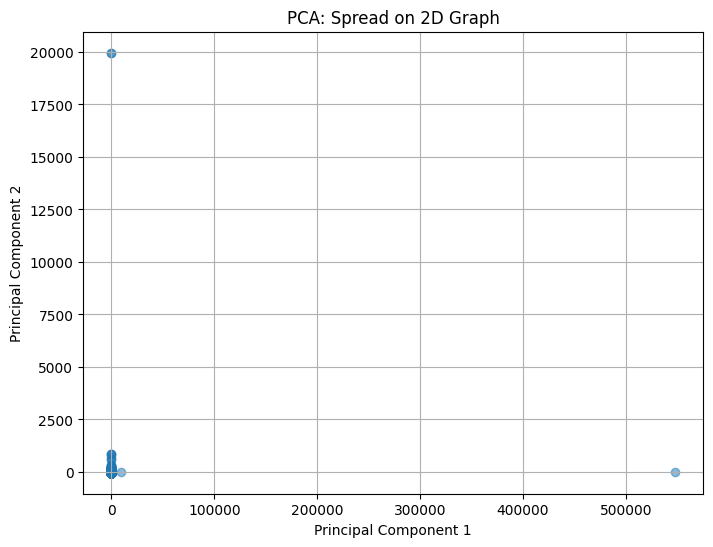

In [51]:
from sklearn.decomposition import PCA
import numpy as np

import matplotlib.pyplot as plt

# Convert relevant columns to numeric, handling non-numeric data
numeric_columns = ['Protein', 'Total Fat', 'Carbohydrate', 'Sugars, total', 'Fiber, total dietary', 'Sodium', 'Cholesterol']
df_numeric = df[numeric_columns].apply(pd.to_numeric, errors='coerce').dropna()

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_numeric)

# Plot the spread on a 2D graph
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.title('PCA: Spread on 2D Graph')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

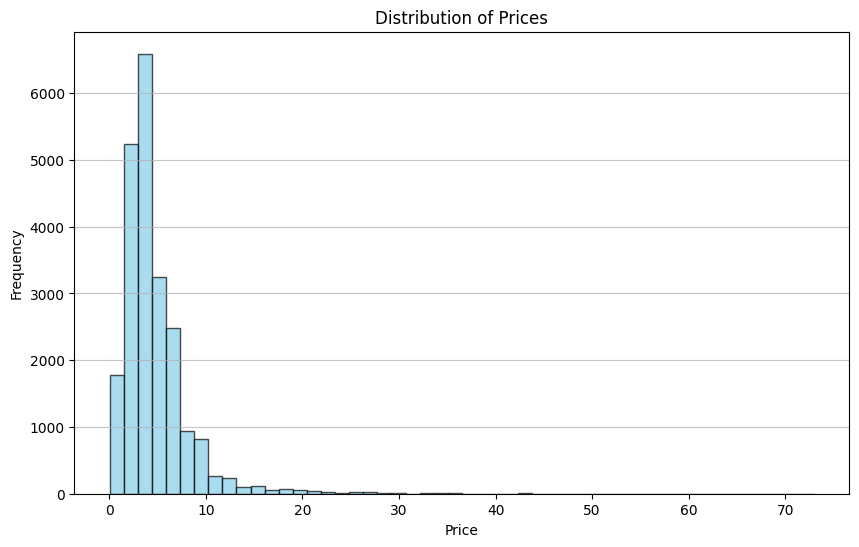

In [52]:
# produce an interesting visualization of the original data
# Visualize the distribution of prices in the dataset
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Convert price to numeric
plt.figure(figsize=(10, 6))
plt.hist(df['price'].dropna(), bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


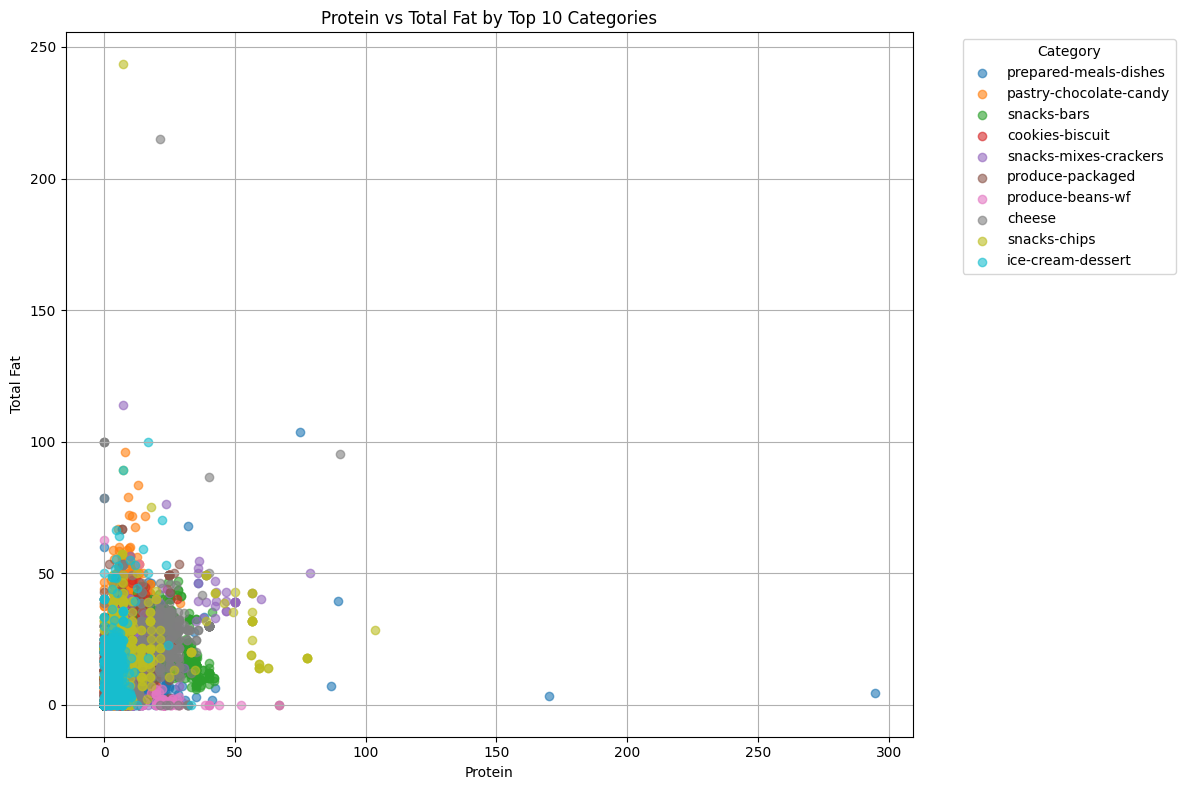

In [53]:
# Scatter plot of Protein vs Total Fat, colored by top 10 categories by number of points
plt.figure(figsize=(12, 8))

# Calculate the top 10 categories by number of points
top_10_numerous_categories = df['category'].value_counts().head(10)

top_10_numerous_categories_list = top_10_numerous_categories.index.tolist()
filtered_df = df[df['category'].isin(top_10_numerous_categories_list)]

for category in top_10_numerous_categories_list:
    subset = filtered_df[filtered_df['category'] == category]
    plt.scatter(
        pd.to_numeric(subset['Protein'], errors='coerce'),
        pd.to_numeric(subset['Total Fat'], errors='coerce'),
        label=category,
        alpha=0.6
    )

plt.title('Protein vs Total Fat by Top 10 Categories')
plt.xlabel('Protein')
plt.ylabel('Total Fat')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

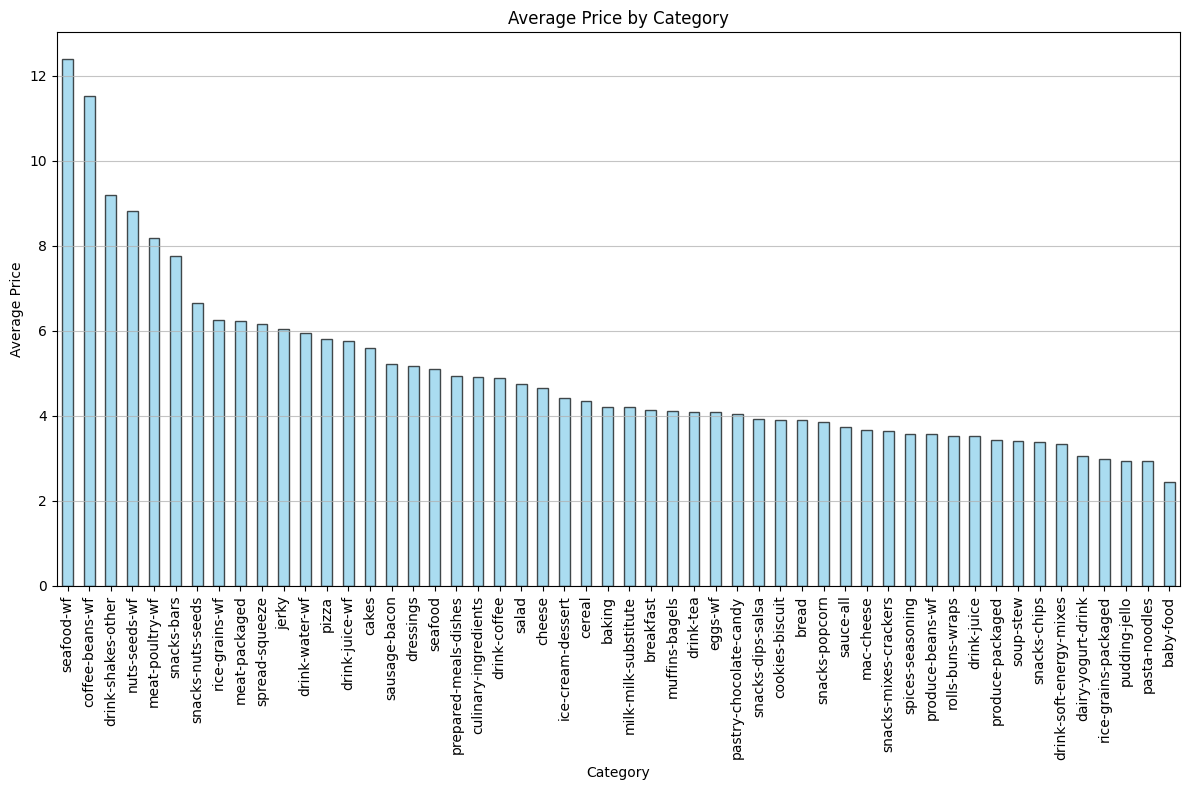

In [54]:
# Calculate the average price by category
avg_price_by_category = df.groupby('category')['price'].mean().sort_values(ascending=False)

# Plot the average price by category
plt.figure(figsize=(12, 8))
avg_price_by_category.plot(kind='bar', color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

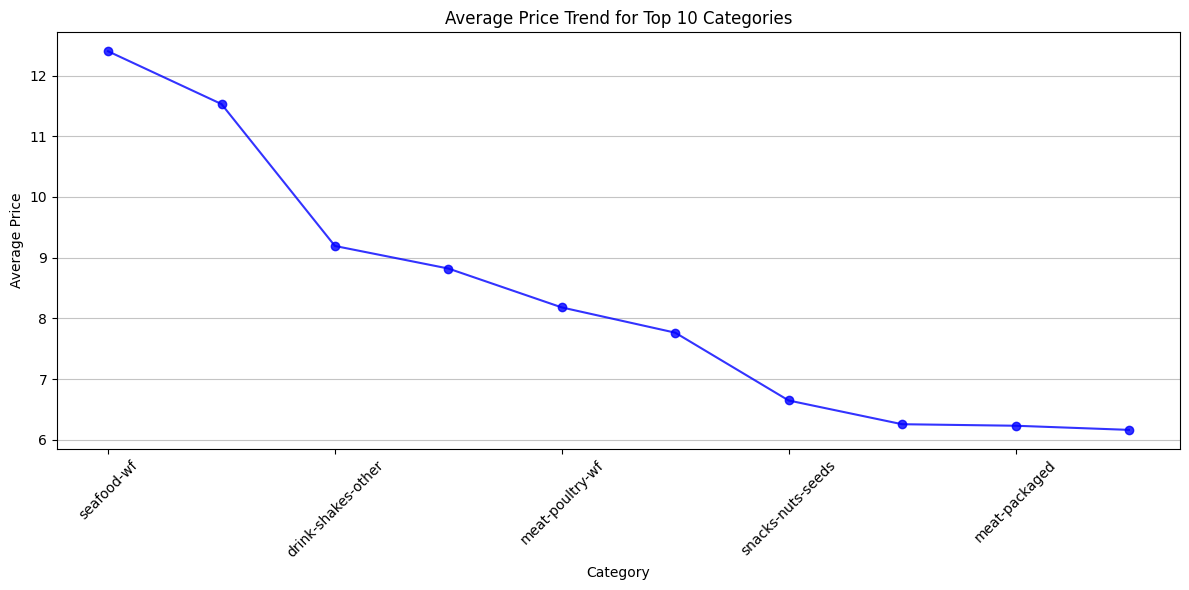

In [55]:
# Select the top 10 categories with the highest average prices
top_10_categories = avg_price_by_category.head(10)

# Plot the average price trend for these categories
plt.figure(figsize=(12, 6))
top_10_categories.plot(kind='line', marker='o', color='blue', alpha=0.8)
plt.title('Average Price Trend for Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [56]:
n = 60
prod = 1

for i in range(n):
    prod *= (365 - i + 1)/365

print(f"Probability of at least two people sharing a birthday in a group of {n} people: {1 - prod:.2%}")

Probability of at least two people sharing a birthday in a group of 60 people: 99.30%


In [57]:
prod

0.007029758572819126

In [58]:
# import data from grocerydb.csv
# into pandas dataframe

import pandas as pd
import os
import sys
import csv
import json
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# check if grocerydb.csv exists
if not os.path.exists('grocerydb.csv'):
    print("grocerydb.csv not found")
    sys.exit(1)

# read grocerydb.csv into pandas dataframe
df = pd.read_csv('grocerydb.csv', encoding='utf-8', dtype=str)
df["Sugars, total"] = df["Sugars, total"].str.replace("g", "").astype(float)
df["Fiber, total dietary"] = df["Fiber, total dietary"].str.replace("g", "").astype(float)
df["FPro"] = df["FPro"].str.replace("g", "").astype(float)
df["Sodium"] = df["Sodium"].str.replace("mg", "").astype(float)
df.head()

,name,store,category,brand,FPro,FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Sodium,Cholesterol
0,Stonyfield Organic Whole Milk Strawberry Beet ...,Target,baby-food,Stonyfield,0.815250,3,5.29,0.043984147,396.893,5.050505051,3.03030303,12.12121212,9.090909,0.000000,0.080808,0.01010101
1,Stonyfield Organic Whole Milk Pear Spinach Man...,Target,baby-food,Stonyfield,0.815250,3,5.29,0.043984147,396.893,5.050505051,3.03030303,12.12121212,9.090909,0.000000,0.080808,0.01010101
2,Once Upon a Farm Organic Mama Blueberry Fruit ...,Target,baby-food,Once Upon a Farm,0.583219,3,2.79,0.055973209,90.7184,1.098901099,0.549450549,13.18681319,7.692308,2.197802,0.010989,0
3,Once Upon a Farm Organic Strawberry Kids&#39; ...,Target,baby-food,Once Upon a Farm,0.451056,0,2.49,0.019213302,90.7184,5.494505495,7.692307692,15.38461538,8.791209,3.296703,0.000000,0
4,Horizon Organic Growing Years Strawberry Kids&...,Target,baby-food,DANNON,0.773519,3,4.99,0.017781331,396.893,3.03030303,1.01010101,14.14141414,6.060606,2.020202,0.050505,0.005050505


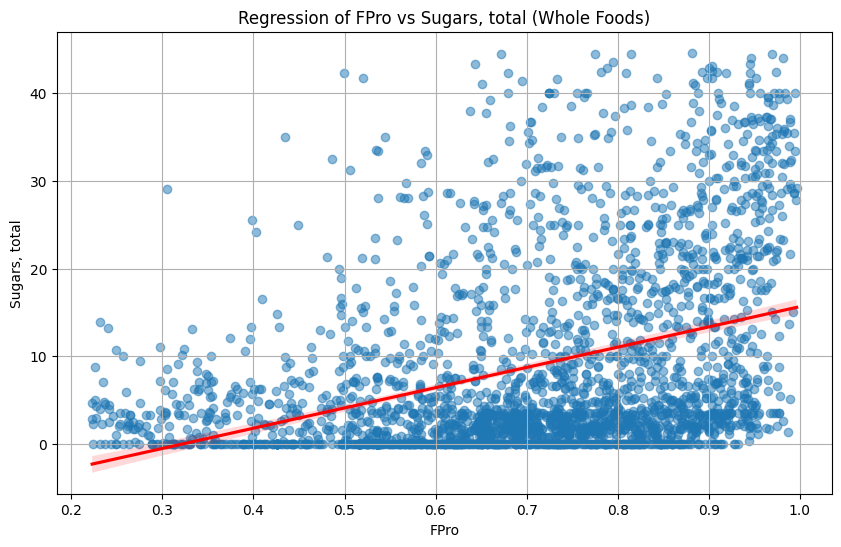

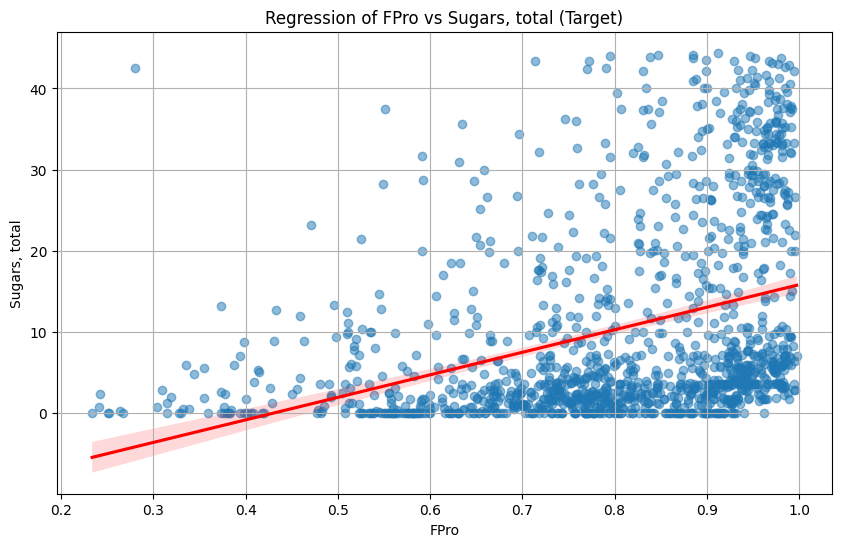

In [60]:
import seaborn as sns

# Define a function to filter out outliers using IQR
def filter_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Group by brands and category, aggregating by mean
df_grouped = df.groupby(['brand', 'category', 'store'])[['FPro', 'Sugars, total']].mean().reset_index()

# Filter out outliers for FPro and Sugars, total
df_filtered = filter_outliers(df_grouped, 'FPro')
df_filtered = filter_outliers(df_filtered, 'Sugars, total')

# Filter data for Whole Foods and Target
df_whole_foods = df_filtered[df_filtered['store'] == 'WholeFoods']
df_target = df_filtered[df_filtered['store'] == 'Target']

# Plot regression for Whole Foods
plt.figure(figsize=(10, 6))
sns.regplot(x='FPro', y='Sugars, total', data=df_whole_foods, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Regression of FPro vs Sugars, total (Whole Foods)')
plt.xlabel('FPro')
plt.ylabel('Sugars, total')
plt.grid(True)
plt.show()

# Plot regression for Target
plt.figure(figsize=(10, 6))
sns.regplot(x='FPro', y='Sugars, total', data=df_target, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Regression of FPro vs Sugars, total (Target)')
plt.xlabel('FPro')
plt.ylabel('Sugars, total')
plt.grid(True)
plt.show()


C:\Users\quydz\AppData\Local\Temp\ipykernel_15712\2182581537.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='FPro_class', y='Sodium', data=df_filtered, palette='Set2', inner='quartile')


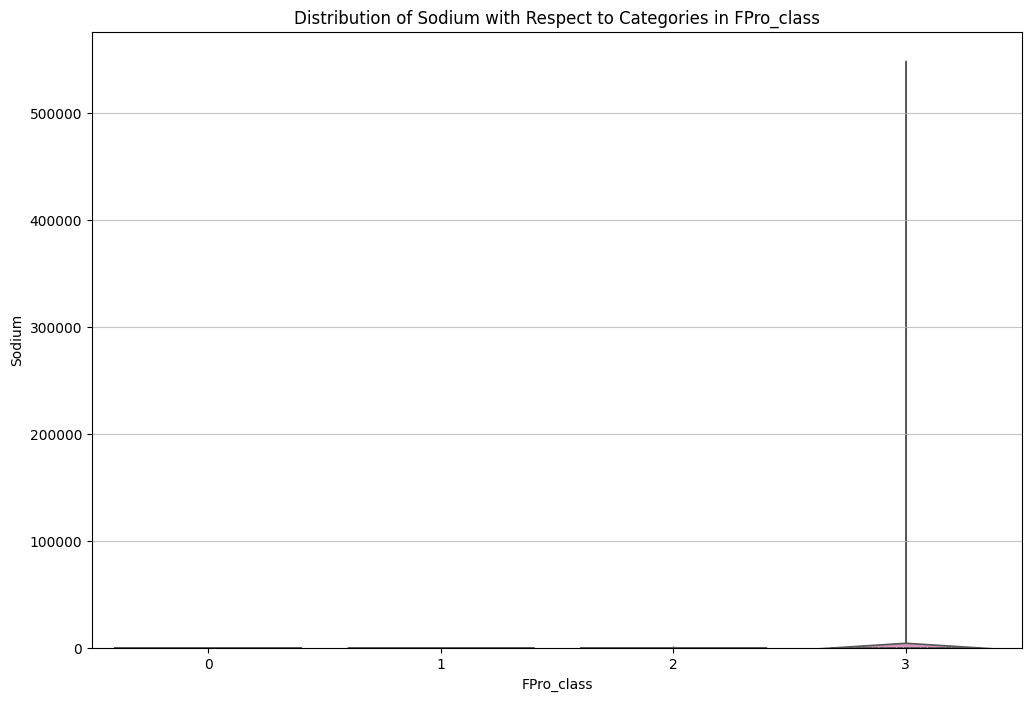

In [61]:
# Define a function to filter out outliers using IQR
def filter_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Filter out outliers for Sodium
df_filtered = filter_outliers(df, 'Sodium')
df_filtered = df.copy()

# Reorder x-axis by ascending order of FPro_class
df_filtered['FPro_class'] = pd.to_numeric(df_filtered['FPro_class'], errors='coerce')
df_filtered = df_filtered.sort_values('FPro_class')

# Plot violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='FPro_class', y='Sodium', data=df_filtered, palette='Set2', inner='quartile')
plt.ylim(bottom=0)  # Cut off the plot at y=0
plt.title('Distribution of Sodium with Respect to Categories in FPro_class')
plt.xlabel('FPro_class')
plt.ylabel('Sodium')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [62]:
df["Sodium"].min(), df["Sodium"].max(), df["Sodium"].mean(), df["Sodium"].std()

(0.0, 547619.0476, 21.745257196541395, 3380.434877323037)

In [63]:
max_sodium_row = df.loc[df['Sodium'].idxmax()]
max_sodium_row

name                    NATURES OWN Perfectly Crafted Thick Sliced Whi...
store                                                             Walmart
category                                                            bread
brand                                                        Nature's Own
FPro                                                             0.928778
FPro_class                                                              3
price                                                                 2.5
price percal                                                  0.001530483
package_weight                                                    623.689
Protein                                                       9.523809524
Total Fat                                                     3.571428571
Carbohydrate                                                  52.38095238
Sugars, total                                                    4.761905
Fiber, total dietary                  

In [64]:
df['Sodium'].idxmax()

1112